<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

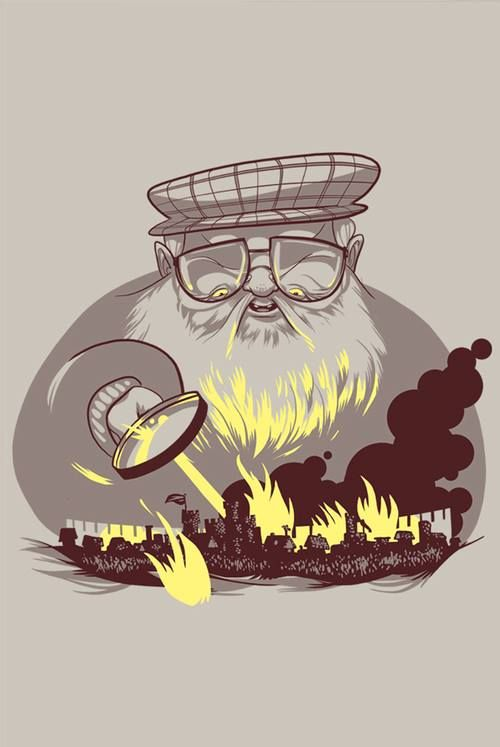

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 39.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 35.5MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [3]:
data = pd.read_csv("/content/game_of_thrones_train.csv", index_col="S.No")

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [4]:
data.isna().sum()

,0
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
mother,1539
father,1535
heir,1536
house,381
spouse,1357


In [5]:
# Удаляем столбцы в которых более 70% nan значений

len_data = len(data)
print('total count of data: ', len_data)

ser_count_na = data.isna().sum()
for name, val in ser_count_na.items():
    if val/len_data >= 0.7:
      data.drop(name, axis=1, inplace=True)
      print(name)
data.isna().sum()

total count of data:  1557
dateOfBirth
mother
father
heir
spouse
isAliveMother
isAliveFather
isAliveHeir
isAliveSpouse
age


,0
name,0
title,840
male,0
culture,1069
house,381
book1,0
book2,0
book3,0
book4,0
book5,0


In [6]:
import numpy as np
import re

# Если название дома есть в имени, то добавляем в house
categorial_data = data.select_dtypes(include=['object'])
for i, row in categorial_data.iterrows():
  if pd.isna(row['house']) == True and pd.isna(row['name']) == False:
    name = row['name']
    name = re.sub(r'\([^)]*\)', '', name)
    name_li = name.split()
    if len(name_li) > 1:
      house_from_name = name_li[-1]
      categorial_data.loc[i, 'house'] = house_from_name
categorial_data

,name,title,culture,house
S.No,,,,
1,Viserys II Targaryen,NaN,NaN,Targaryen
2,Walder Frey,Lord of the Crossing,Rivermen,House Frey
3,Addison Hill,Ser,NaN,House Swyft
4,Aemma Arryn,Queen,NaN,House Arryn
5,Sylva Santagar,Greenstone,Dornish,House Santagar
...,...,...,...,...
1553,Marwyn,Archmaester,NaN,NaN
1554,Masha Heddle,NaN,NaN,Heddle
1555,Matthos Seaworth,NaN,NaN,House Seaworth


In [7]:
categorial_data['house'].fillna('No house', inplace=True)
categorial_data['culture'].fillna('No culture', inplace=True)
categorial_data['title'].fillna('No title', inplace=True)
categorial_data.isna().sum()

<ipython-input-7-f12d7b503933>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  categorial_data['house'].fillna('No house', inplace=True)
<ipython-input-7-f12d7b503933>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

,0
name,0
title,0
culture,0
house,0


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [8]:
numeric_data_cols = [x for x in data.columns.to_list() if x not in categorial_data.columns.to_list()]
numeric_data = data[numeric_data_cols]

for i, row in numeric_data.iterrows():
  if row['popularity'] > 0.5:
    numeric_data.loc[i, 'isPopular'] = 1
  else:
    numeric_data.loc[i, 'isPopular'] = 0
  if row['numDeadRelations'] > 0:
    numeric_data.loc[i, 'boolDeadRelations'] = 1
  else:
    numeric_data.loc[i, 'boolDeadRelations'] = 0

numeric_data['isPopular'] = pd.to_numeric(numeric_data['isPopular'], downcast='integer')
numeric_data['boolDeadRelations'] = pd.to_numeric(numeric_data['boolDeadRelations'], downcast='integer')

<ipython-input-8-ef4e4fb03ccd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_data.loc[i, 'isPopular'] = 1
<ipython-input-8-ef4e4fb03ccd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_data.loc[i, 'boolDeadRelations'] = 1
<ipython-input-8-ef4e4fb03ccd>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [9]:
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

for i, row in categorial_data.iterrows():
  for k, val_li in cult.items():
    if row['culture'] in val_li:
      categorial_data.loc[i, 'culture'] = k
      break
categorial_data

,name,title,culture,house
S.No,,,,
1,Viserys II Targaryen,No title,No culture,Targaryen
2,Walder Frey,Lord of the Crossing,Rivermen,House Frey
3,Addison Hill,Ser,No culture,House Swyft
4,Aemma Arryn,Queen,No culture,House Arryn
5,Sylva Santagar,Greenstone,Dornish,House Santagar
...,...,...,...,...
1553,Marwyn,Archmaester,No culture,No house
1554,Masha Heddle,No title,No culture,Heddle
1555,Matthos Seaworth,No title,No culture,House Seaworth


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [10]:
data = pd.concat([numeric_data, categorial_data], axis=1)
data.drop(columns=['name', 'numDeadRelations', 'popularity'], inplace = True)
data

,male,book1,book2,book3,book4,book5,isMarried,isNoble,isAlive,isPopular,boolDeadRelations,title,culture,house
S.No,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,1,1,No title,No culture,Targaryen
2,1,1,1,1,1,1,1,1,1,1,1,Lord of the Crossing,Rivermen,House Frey
3,1,0,0,0,1,0,0,1,1,0,0,Ser,No culture,House Swyft
4,0,0,0,0,0,0,1,1,0,0,0,Queen,No culture,House Arryn
5,0,0,0,0,1,0,1,1,1,0,0,Greenstone,Dornish,House Santagar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,1,0,1,1,0,0,1,1,0,0,Archmaester,No culture,No house
1554,0,1,1,0,0,0,0,0,0,0,0,No title,No culture,Heddle
1555,1,0,1,1,1,1,0,0,0,0,0,No title,No culture,House Seaworth


**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

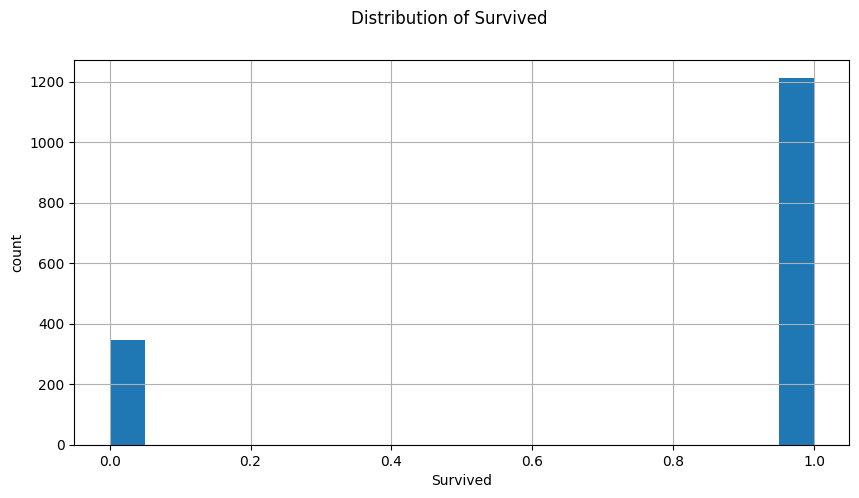

In [11]:
# несбалансирован, при предсказании будем использовать параметр class_weight='balanced'
plt.figure(figsize = (10, 5))

data['isAlive'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('Survived')

plt.suptitle('Distribution of Survived')
plt.show()

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [12]:
categorial_data = data.select_dtypes(include=['object'])

# Заменяем редко встречающиеся значения признаков на rare
# title
rare_title_li = []
for index, val in categorial_data['title'].value_counts().items():
  if val < 10:
    rare_title_li.append(index)
categorial_data['title'] = categorial_data['title'].apply(lambda x: 'Rare' if x in rare_title_li else x)
categorial_data['culture'].value_counts()

# culture
rare_culture_li = []
for index, val in categorial_data['culture'].value_counts().items():
  if val < 10:
    rare_culture_li.append(index)
categorial_data['culture'] = categorial_data['culture'].apply(lambda x: 'Rare' if x in rare_culture_li else x)

# Убираем слово House из значений house
categorial_data['house'] = categorial_data['house'].str.replace('House', '')

# house
rare_house_li = []
for index, val in categorial_data['house'].value_counts().items():
  if val < 5:
    rare_house_li.append(index)
categorial_data['house'] = categorial_data['house'].apply(lambda x: 'Rare' if x in rare_house_li else x)
categorial_data

,title,culture,house
S.No,,,
1,No title,No culture,Targaryen
2,Rare,Rivermen,Frey
3,Ser,No culture,Swyft
4,Rare,No culture,Arryn
5,Rare,Dornish,Rare
...,...,...,...
1553,Archmaester,No culture,No house
1554,No title,No culture,Rare
1555,No title,No culture,Seaworth


In [13]:
from sklearn.preprocessing import OneHotEncoder

col_cat_li = categorial_data.columns.to_list()

# Создание экземпляра OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # 'ignore' для новых категорий


# Преобразование обучающих данных
categorial_data_encoded = encoder.fit_transform(categorial_data)

one_hot_cat_data_df = pd.DataFrame(categorial_data_encoded, columns=encoder.get_feature_names_out(col_cat_li), index=data.index)
one_hot_cat_data_df

,title_Archmaester,title_Lady,title_Lord,title_Maester,title_No title,title_Rare,title_Septon,title_Ser,title_Winterfell,culture_Braavosi,...,house_Alchemists' Guild,house_Faith of the Seven,house_Kingsguard,house_Night's Watch,house_No house,house_Rare,house_Second Sons,house_Stark,house_Stone Crows,house_Targaryen
S.No,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1554,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1555,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


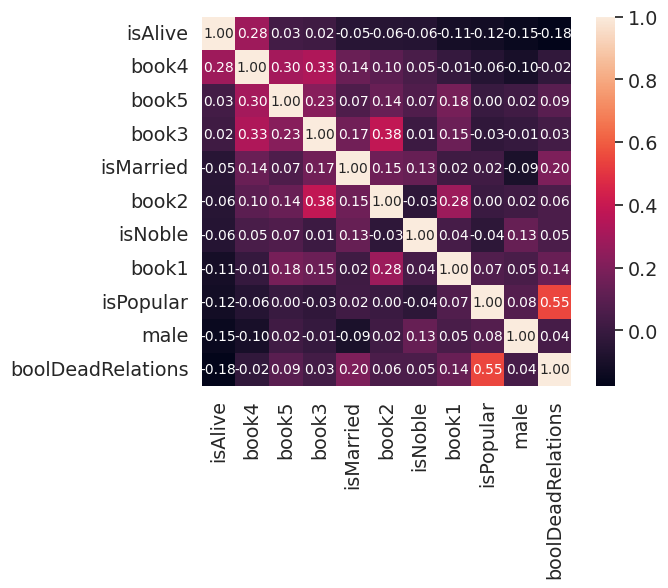

In [14]:
numeric_data_cols = [x for x in data.columns.to_list() if x not in categorial_data.columns.to_list()]
numeric_data = data[numeric_data_cols]

data = pd.concat([numeric_data, categorial_data], axis=1)

corrmat = numeric_data.corr()
k = 12 # number of variables for heatmap
cols = corrmat.nlargest(k, 'isAlive')['isAlive'].index
cm = np.corrcoef(numeric_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

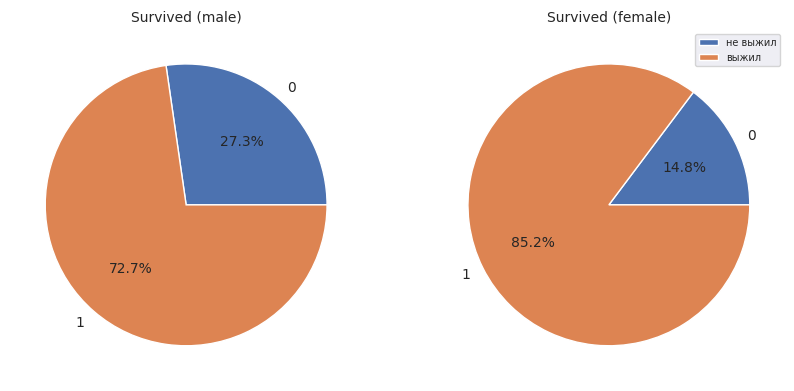

In [15]:
# влиянение пола
data_1 = data[data['male']== 1]['isAlive'].value_counts().sort_values()
data_2 = data[data['male']== 0]['isAlive'].value_counts().sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

ax1.pie(data_1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax2.pie(data_2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})

ax1.set_title('Survived (male)', fontsize=10)
ax2.set_title('Survived (female)', fontsize=10)

plt.legend(['не выжил', 'выжил'], fontsize=7)

plt.show()

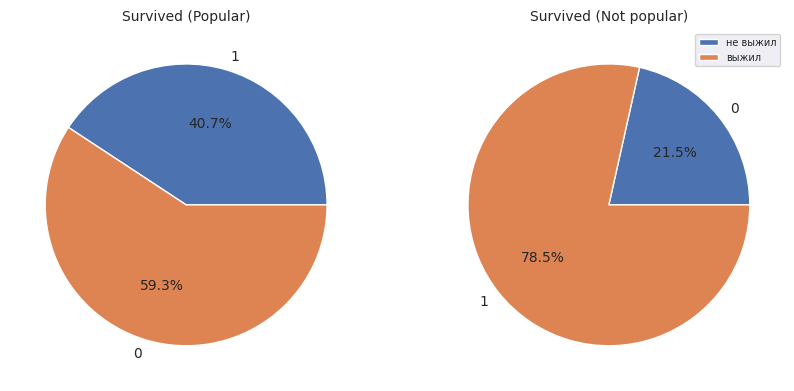

In [16]:
# влияние популярности
data_1 = data[data['isPopular']== 1]['isAlive'].value_counts().sort_values()
data_2 = data[data['isPopular']== 0]['isAlive'].value_counts().sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

ax1.pie(data_1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax2.pie(data_2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})

ax1.set_title('Survived (Popular)', fontsize=10)
ax2.set_title('Survived (Not popular)', fontsize=10)

plt.legend(['не выжил', 'выжил'], fontsize=7)

plt.show()

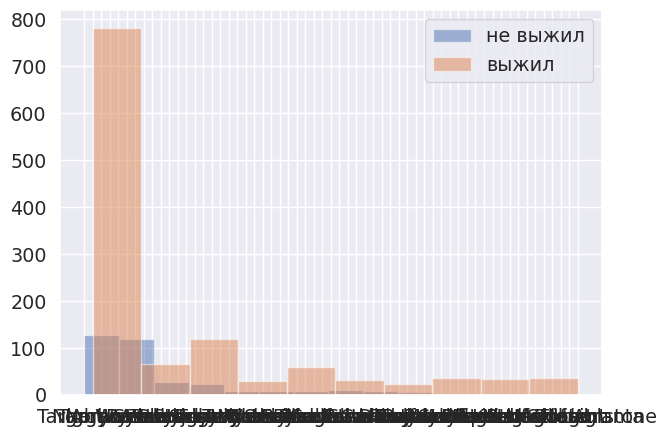

In [17]:
# isAlive от номера дома
plt.figure(figsize=(7, 5))

plt.hist(data['house'][data['isAlive'] == 0], alpha=0.5, label='не выжил')
plt.hist(data['house'][data['isAlive'] == 1], alpha=0.5, label='выжил')

plt.legend()

plt.show()

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [18]:
data = pd.concat([numeric_data, one_hot_cat_data_df], axis=1)

X = data.drop(columns=['isAlive']).values
y = data['isAlive'].values

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [22]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [23]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [24]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1, class_weight='balanced')

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [25]:
# Шаг 1. создание модели
model1 = AdaBoostClassifier()

# Шаг 2. обучение модели
model1.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = model1.predict(X_test)

In [26]:
# Шаг 1. создание модели
model2 = RandomForestClassifier(class_weight='balanced')

# Шаг 2. обучение модели
model2.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = model2.predict(X_test)

In [27]:
# Шаг 1. создание модели
model3 = GaussianProcessClassifier()

# Шаг 2. обучение модели
model3.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = model3.predict(X_test)


In [28]:
# Шаг 1. создание модели
model4 = GaussianNB()

# Шаг 2. обучение модели
model4.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = model4.predict(X_test)


In [29]:
# Шаг 1. создание модели
model5 = KNeighborsClassifier()

# Шаг 2. обучение модели
model5.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = model5.predict(X_test)


In [30]:
# Шаг 1. создание модели
model6 = SVC(class_weight='balanced')

# Шаг 2. обучение модели
model6.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = model6.predict(X_test)


In [31]:
# Шаг 1. создание модели
model7 = DecisionTreeClassifier(class_weight='balanced')

# Шаг 2. обучение модели
model7.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = model7.predict(X_test)


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [32]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [33]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.6827


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [34]:
model_li = [model1, model2, model3, model4, model5, model6, model7]

i = 1
for model in model_li:
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"model{i} accuracy : %.4f" % accuracy)
  i+=1

model1 accuracy : 0.7692
model2 accuracy : 0.7756
model3 accuracy : 0.7788
model4 accuracy : 0.3622
model5 accuracy : 0.7756
model6 accuracy : 0.6731
model7 accuracy : 0.7468


Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [35]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 10.0MB/s]


In [36]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [37]:
data_test = pd.read_csv("/content/game_of_thrones_test.csv", index_col="S.No")
data_test

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,NaN,0,NaN,156.0,NaN,NaN,NaN,House Blackwood,NaN,...,1,NaN,NaN,NaN,NaN,0,0,100.0,0,0.050167
1559,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.745819
1560,Merrit,NaN,0,NaN,NaN,NaN,NaN,NaN,Brotherhood without banners,NaN,...,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0.010033
1561,Meryn Trant,Ser,1,NaN,NaN,NaN,NaN,NaN,House Trant,NaN,...,1,NaN,NaN,NaN,NaN,0,1,NaN,0,0.220736
1562,Merrett Frey,NaN,1,Riverlands,262.0,NaN,NaN,NaN,House Frey,Mariya Darry,...,1,NaN,NaN,NaN,1.0,1,0,38.0,0,0.434783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,Luwin,NaN,1,Westeros,NaN,NaN,NaN,NaN,House Stark,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.351171
1943,Reek,NaN,1,NaN,NaN,NaN,NaN,NaN,House Bolton,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.096990
1944,Symeon Star-Eyes,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.030100


In [38]:
drop_col_li = ['dateOfBirth',
'mother',
'father',
'heir',
'spouse',
'isAliveMother',
'isAliveFather',
'isAliveHeir',
'isAliveSpouse',
'age'
]
data_test.drop(drop_col_li, axis=1, inplace=True)

In [39]:
categorial_data_test = data_test.select_dtypes(include=['object'])
for i, row in categorial_data_test.iterrows():
  if pd.isna(row['house']) == True and pd.isna(row['name']) == False:
    name = row['name']
    name = re.sub(r'\([^)]*\)', '', name)
    name_li = name.split()
    if len(name_li) > 1:
      house_from_name = name_li[-1]
      categorial_data_test.loc[i, 'house'] = house_from_name
categorial_data_test

,name,title,culture,house
S.No,,,,
1558,Melissa Blackwood,NaN,NaN,House Blackwood
1559,Melisandre,NaN,Asshai,R'hllor
1560,Merrit,NaN,NaN,Brotherhood without banners
1561,Meryn Trant,Ser,NaN,House Trant
1562,Merrett Frey,NaN,Riverlands,House Frey
...,...,...,...,...
1942,Luwin,NaN,Westeros,House Stark
1943,Reek,NaN,NaN,House Bolton
1944,Symeon Star-Eyes,NaN,NaN,Star-Eyes


In [40]:
categorial_data_test['house'].fillna('No house', inplace=True)
categorial_data_test['culture'].fillna('No culture', inplace=True)
categorial_data_test['title'].fillna('No title', inplace=True)
categorial_data_test.isna().sum()

<ipython-input-40-d8e2d06bd3f6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  categorial_data_test['house'].fillna('No house', inplace=True)
<ipython-input-40-d8e2d06bd3f6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

,0
name,0
title,0
culture,0
house,0


In [41]:
numeric_data_test_cols = [x for x in data_test.columns.to_list() if x not in categorial_data_test.columns.to_list()]
numeric_data_test = data_test[numeric_data_test_cols]

for i, row in numeric_data_test.iterrows():
  if row['popularity'] > 0.5:
    numeric_data_test.loc[i, 'isPopular'] = 1
  else:
    numeric_data_test.loc[i, 'isPopular'] = 0
  if row['numDeadRelations'] > 0:
    numeric_data_test.loc[i, 'boolDeadRelations'] = 1
  else:
    numeric_data_test.loc[i, 'boolDeadRelations'] = 0

numeric_data_test['isPopular'] = pd.to_numeric(numeric_data_test['isPopular'], downcast='integer')
numeric_data_test['boolDeadRelations'] = pd.to_numeric(numeric_data_test['boolDeadRelations'], downcast='integer')

<ipython-input-41-2deb5887251c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_data_test.loc[i, 'isPopular'] = 0
<ipython-input-41-2deb5887251c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_data_test.loc[i, 'boolDeadRelations'] = 0
<ipython-input-41-2deb5887251c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [42]:
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

for i, row in categorial_data_test.iterrows():
  for k, val_li in cult.items():
    if row['culture'] in val_li:
      categorial_data_test.loc[i, 'culture'] = k
      break
categorial_data_test

,name,title,culture,house
S.No,,,,
1558,Melissa Blackwood,No title,No culture,House Blackwood
1559,Melisandre,No title,Asshai,R'hllor
1560,Merrit,No title,No culture,Brotherhood without banners
1561,Meryn Trant,Ser,No culture,House Trant
1562,Merrett Frey,No title,Riverlands,House Frey
...,...,...,...,...
1942,Luwin,No title,Westeros,House Stark
1943,Reek,No title,No culture,House Bolton
1944,Symeon Star-Eyes,No title,No culture,Star-Eyes


In [43]:
data_test = pd.concat([numeric_data_test, categorial_data_test], axis=1)
data_test.drop(columns=['name', 'numDeadRelations', 'popularity'], inplace = True)

In [44]:
categorial_data_test = data_test.select_dtypes(include=['object'])

categorial_data_test['title'] = categorial_data_test['title'].apply(lambda x: 'Rare' if x in rare_title_li else x)

categorial_data_test['culture'] = categorial_data_test['culture'].apply(lambda x: 'Rare' if x in rare_culture_li else x)

categorial_data_test['house'] = categorial_data_test['house'].str.replace('House', '')

categorial_data_test['house'] = categorial_data_test['house'].apply(lambda x: 'Rare' if x in rare_house_li else x)
categorial_data_test

,title,culture,house
S.No,,,
1558,No title,No culture,Rare
1559,No title,Asshai,Rare
1560,No title,No culture,Rare
1561,Ser,No culture,Trant
1562,No title,Riverlands,Frey
...,...,...,...
1942,No title,Rare,Stark
1943,No title,No culture,Bolton
1944,No title,No culture,Star-Eyes


In [45]:
numeric_data_test_cols = [x for x in data_test.columns.to_list() if x not in categorial_data_test.columns.to_list()]
numeric_data_test = data_test[numeric_data_test_cols]

In [46]:
enc_cat_data_test = encoder.transform(categorial_data_test)
cat_enc_df = pd.DataFrame(enc_cat_data_test, columns=encoder.get_feature_names_out(categorial_data_test.columns), index=data_test.index)

In [47]:
data_test = pd.concat([numeric_data_test, cat_enc_df], axis=1)

In [48]:
X_f_test = data_test.values
X_f_test = scaler.transform(X_f_test)
X_f_test

array([[-1.18077549, -0.40037261, -0.70072674, ..., -0.08041927,
        -0.07519495, -0.09441451],
       [-1.18077549, -0.40037261,  1.42708982, ..., -0.08041927,
        -0.07519495, -0.09441451],
       [-1.18077549, -0.40037261, -0.70072674, ..., -0.08041927,
        -0.07519495, -0.09441451],
       ...,
       [ 0.84690104,  2.49767334,  1.42708982, ..., -0.08041927,
        -0.07519495, -0.09441451],
       [ 0.84690104, -0.40037261, -0.70072674, ..., -0.08041927,
        -0.07519495, -0.09441451],
       [ 0.84690104, -0.40037261, -0.70072674, ..., -0.08041927,
        -0.07519495, -0.09441451]])

In [49]:
y_ft_pred = model5.predict(X_f_test)
y_ft_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Как сохранить измененный Pandas DataFrame в csv файл:

In [50]:
submission = pd.DataFrame(y_ft_pred, columns=['isAlive'], index=submission.index)
submission

,isAlive
S.No,
1558,1
1559,1
1560,1
1561,1
1562,1
...,...
1942,1
1943,1
1944,0


In [51]:
submission.to_csv("/content/new_submission.csv", index=False)